# Implementing a Linear Regression problem with Python

Now, we are ready to implement our own linear regression example. 

In linear regression, our hypothesis function $h_\theta$ is:

$$h_\theta(x) = \theta_0 + \theta_1x$$

And, as we are doing regression, our cost function is: 

$$J(\theta_0,\theta_1) = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i-y_i)^2 = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)^2 $$

Nota that, the cost funtion is just the sum of all the square errors from our hypothesis ($\hat{y}_i$) versus the data ($y_i$).

The best parameters for our hypothesis will give us the **minimum cost function**.

## Finding a minimum for J

Finding a minimum of a function is equivalent to finding the parameters that make the gradient of that function to vanish. In other words:

$$\nabla_{\theta} J(\theta) = 0$$

We will implement two ways of solving this problem.

### A) Gradient descent (Numerical method)


From a starting point ($\theta$), we will try to move to a new point $\theta '$, decreasing the cost funtion ($J(\theta)$). We will do this many times, up to we find a minimum (or close enough to it).

#### Partial differentials of the cost function (using chain rule)

$$\frac{\partial J}{\partial\theta_0} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$

$$\frac{\partial J}{\partial\theta_1} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$

Finally, we need to update iteratively the values for $\theta_0$ and $\theta_1$. Using Gradient Descent algorithm  with learning rate ($\alpha$) until convergence criterion ($\epsilon$) is achieved:

         while (convergence==False):
$$\theta_0' = \theta_0 - \alpha \frac{\partial J}{\partial\theta_0} $$
$$\theta_1' = \theta_1 - \alpha \frac{\partial J}{\partial\theta_1} $$
$$J' = J(\theta_0',\theta_1')$$
$$\Delta J = abs(J'-J)$$
$$ convergence = (\Delta J < \epsilon)$$

### B) Normal equations (Algebra)

In matrix notation, we can implement our hypothesis as:

$$h_\theta (x^{(i)})=(x^{(i)})^T \theta$$

Note that, in this case, if we want to consider our hypothesis such $h(\theta) = \theta_0 + \theta_i x^{(i)}$ where $x$ is a vector, for consistency, we need to introduce an additional "constant feature" in our data. In other words, we need to map our input data as follows:

$$x_i \rightarrow [1,x_i]$$

we can express gradient of J as follows:

$$\nabla_{\theta} J(\theta) = X^T X \theta - X^T \vec{y}$$

To minimize J, we set its derivatives to zero, therefore obtaining the **normal equations**:

$$ X^T X \theta = X^T \vec{y}$$

We can solve this equation for theta.

As a final remark, we can extend this method to non linear hypothesis by extending our input data $x$ to the features we need. For example, for a parabolic fit:

$$x_i \rightarrow [1,x_i,x_i^2]$$

# Problem

Giving the data provided below (x->y), find the best equation fit, using:

* Gradient Descent
* Normal Equations

Using your own python implementation, using numpy and scipy tools (**not scipy!**).

## Solution: Already with the results

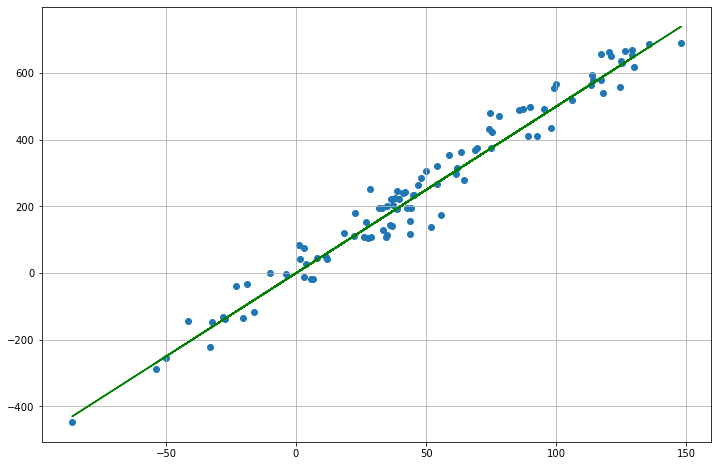

In [1]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# theta result:
theta_0 = 2
theta_1 = 5

X = (np.random.randn(100) + 1) * 50
jitter = 50 * np.random.randn(100)
y = theta_0 + theta_1 * X + jitter

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X, 5*X, 'g')
ax.scatter(X, y)
ax.grid(True)

## Resolution

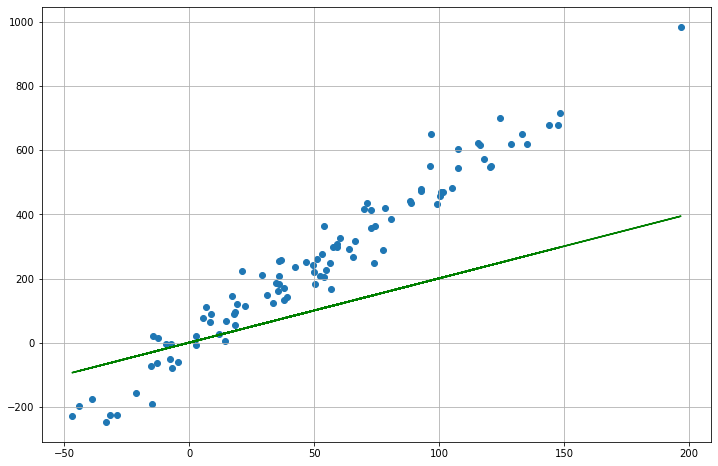

In [2]:
# setting initial values
theta_0 = 1
theta_1 = 2

# Definition of:
# learning rate () = alpha
# convergence criterion () = epsilon
# iteration = iter
alpha = 0.00001
epsilon = 0.0001

# random variable: X
# y = 5x
X = (np.random.randn(100) + 1) * 50
jitter = 50 * np.random.randn(100)
y = 5*X + jitter

h = theta_0 + theta_1 * X

# plotting
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X, h, 'g')
ax.scatter(X, y)
ax.grid(True)

### A) Gradient descent (Numerical method)

In [3]:
# hypothesis function: h
def h_theta(X, theta_0, theta_1):
    
    return theta_0 + theta_1 * X

# cost function: cot_function
def cost_function(X, y, theta_0, theta_1):
    
    total = 0
    h = theta_0 + theta_1 * X
    m = h.shape[0]
    for i in range(m):
        squarred_error = (h[i] - y[i]) ** 2
        total += squarred_error

    return total * (1 / m)

# cost function derivative
def cf_d(X, y, theta_0, theta_1, der):
    '''
    der = d0 or d1
    d0 - parcial derivate based on theta_0
    d1 - parcial derivate based on theta_1
    '''
    h = theta_0 + theta_1 * X
    m = h.shape[0]
    total = 0
    
    if der == 'd0':
        for i in range(m):
            diff = h[i] - y[i]
            total += diff
    elif der == 'd1':
        for i in range(m):
            diff = (h[i] - y[i]) * X[i]
            total += diff
    
    return total * (2 / m)

In [4]:
# iterations update
convergence = False

while(convergence == False):
    J = cost_function(X, y, theta_0, theta_1)
    theta_0 = theta_0 - alpha * cf_d(X, y, theta_0, theta_1, der='d0')
    theta_1 = theta_1 - alpha * cf_d(X, y, theta_0, theta_1, der='d1')

    J_hat = cost_function(X, y, theta_0, theta_1)
    J_delta = abs(J_hat - J)
    
    if J_delta < epsilon:
        convergence = True

print(f'Final convergence = {J_delta}')
print(f'Theta 0 = {theta_0}\nTheta 1 = {theta_1}')

Final convergence = 9.443164663025527e-05
Theta 0 = 1.02865497643387
Theta 1 = 4.93609109042123


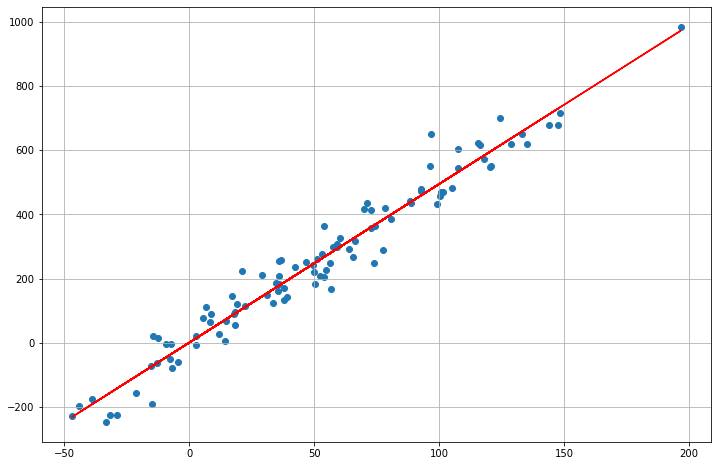

In [5]:
h = h_theta(X, theta_0, theta_1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X, h, 'r')
ax.scatter(X, y)
ax.grid(True)

### B) Normal equations (Algebra)

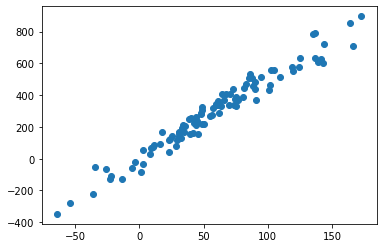

In [6]:
# random variables
X = (np.random.randn(100) + 1) * 50
jitter = 50 * np.random.randn(100)
y = 5*X + jitter

# how data is usually disposed in machine learning
data = np.array([list(i) for i in zip(X, y)])
X, y = data[:,0], data[:,1]

# Reshaping data to matrix
X_mat = np.ones([len(X), 2])
X_mat[:,1] = X
plt.scatter(X, y)
plt.show()

$$ X^T X \theta = X^T \vec{y}$$
$$ (X^T X)^{-1} X^T X \theta = (X^T X)^{-1} X^T \vec{y}$$
$$ \theta = (X^T X)^{-1} X^T \vec{y}$$
$$ A \theta = b $$

In [7]:
# Implementing the formula above
theta = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)
theta

array([10.14554389,  4.93262866])

In [8]:
# Formula applied to obtain the vector theta: using np.linalg.solve
A = X_mat.T.dot(X_mat)
b = X_mat.T.dot(y)

theta = np.linalg.solve(A, b)

# Printing the resulting theta
print(f'Theta_0: {theta[0]}')
print(f'Theta_1: {theta[1]}')

Theta_0: 10.145543894974633
Theta_1: 4.932628663170736


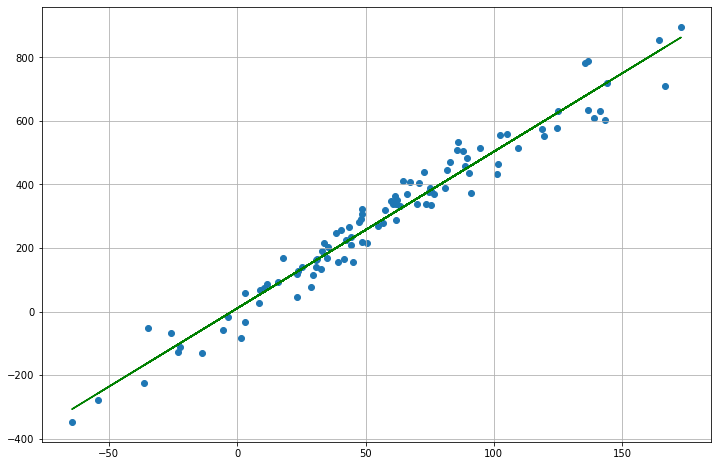

In [9]:
y_hat = theta[0] + theta[1] * X

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X, y_hat, 'g')
ax.scatter(X, y)
ax.grid(True)

## Model results

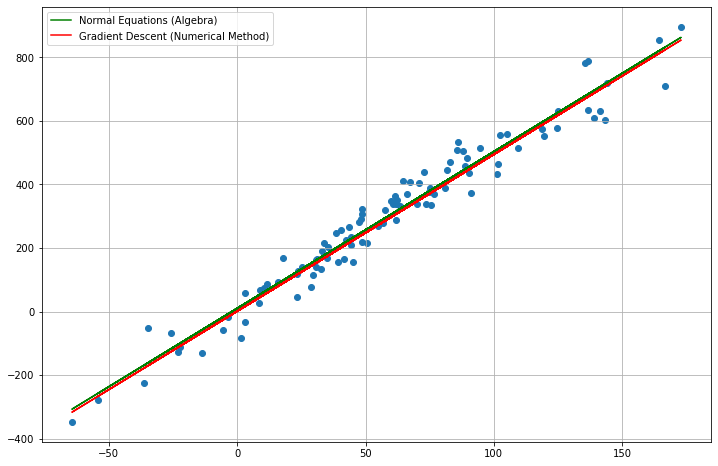

In [11]:
h = h_theta(X, theta_0, theta_1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X, y_hat, 'g', label='Normal Equations (Algebra)')
ax.plot(X, h, 'r', label='Gradient Descent (Numerical Method)')
ax.scatter(X, y)

ax.legend()
ax.grid(True)